In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as ln
import FEM.fem_linear as fe
import FEM.fem_loads as fl
import FEM.fem_validation as val
from VLM import aero_model

**excercise 1.)** 
First investigate the effect of geometry discretisation in spanwise and chordwise direction.

For the wake length use cw= 10 ⋅ c. The goal is to find a discretisation which no longer affects
the solution. Vary the number of spanwise and chordwise panels and observe the effect on
static CL and CDi. Use cosine spanwise and equidistant chordwise distribution of panels.

Choose the minimum discretisation requirements for the cosine distribution, which you will
use for the rest of the study.

In [18]:
c = 0.051
s = 0.451
cw = 10*c

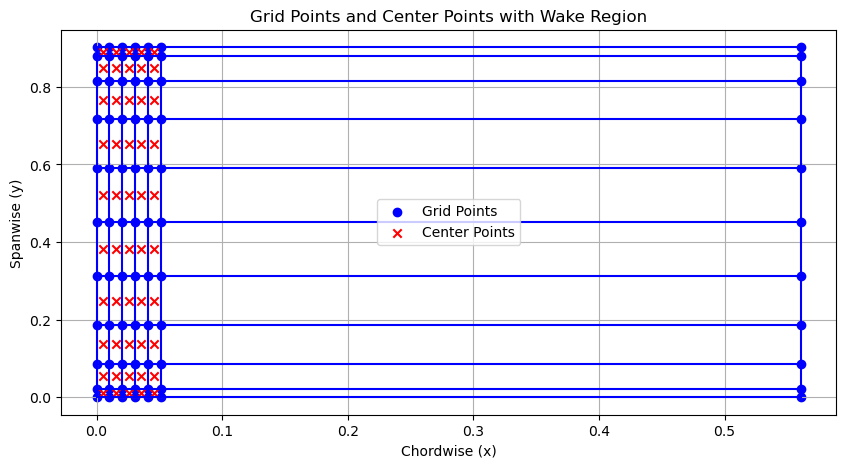

Total Lift Coefficient (CL): 0.19361302173114484
Total Drag Coefficient (CD): 0.0


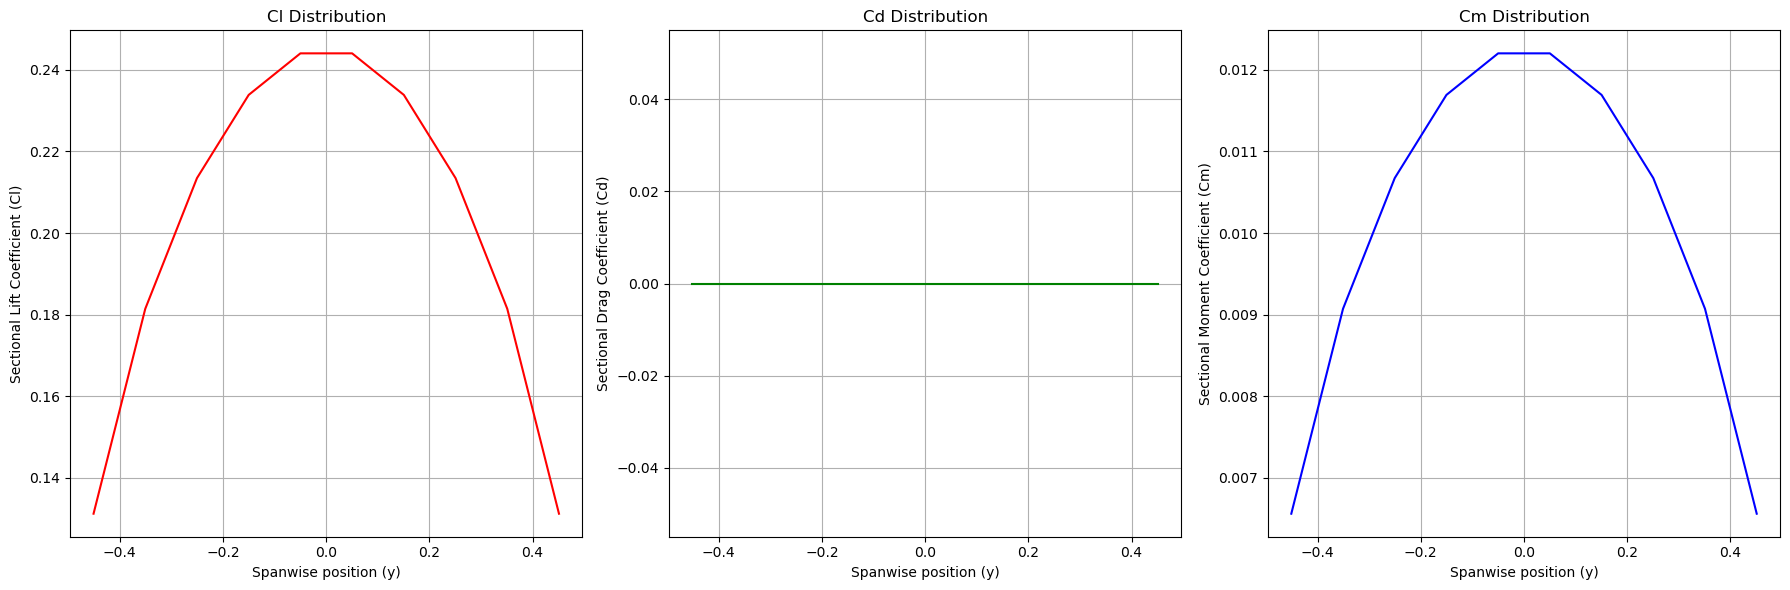

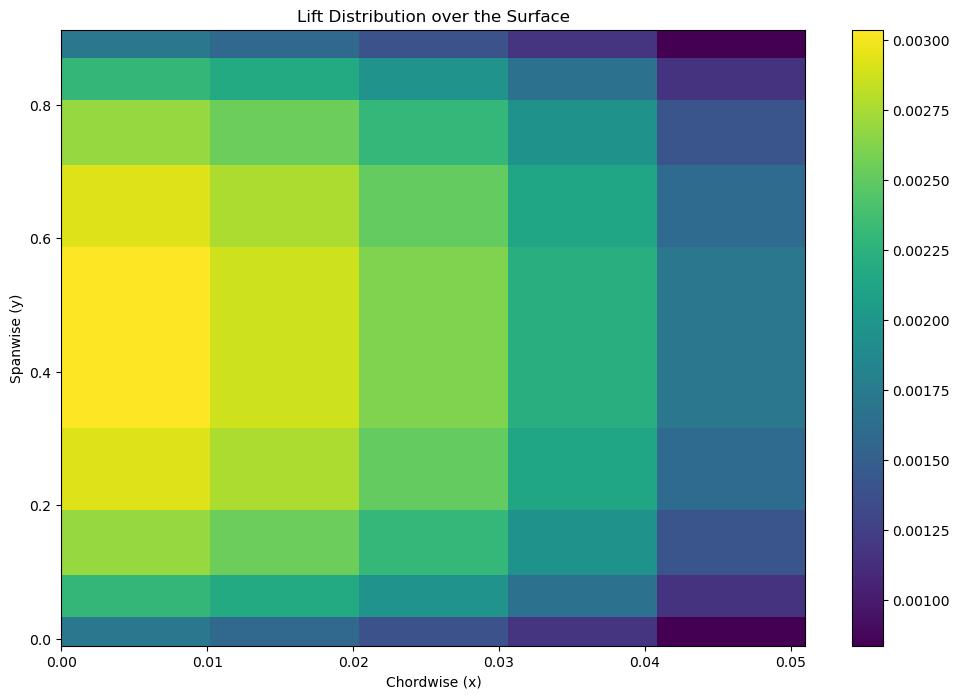

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


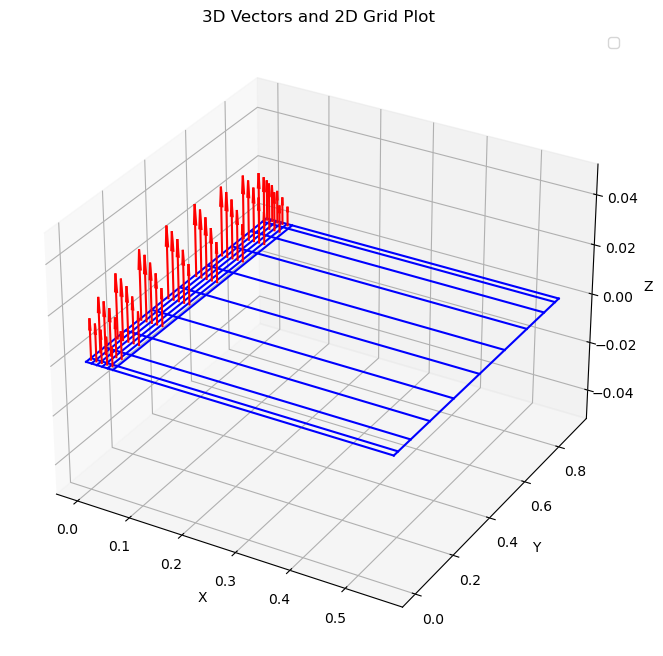

In [19]:
model = aero_model(s, c)
model.VLM2Dmesh_cos(N_pannels_chordwise=5, N_pannels_spanwise=10, l_wake=cw)
model.plot_VLMgrid()
model.VLM()
Cl, Cd, Cm = model.compute_cl_cd_cm()
# Integrate CL and CD
CL, CD = model.integrate_CL_CD(Cl, Cd)
print(f"Total Lift Coefficient (CL): {CL}")
print(f"Total Drag Coefficient (CD): {CD}")

x_cp = 0.3 * model.c  # Example point at 30% chord
Cm = model.compute_cm_about_point(x_cp)

model.plot_cl_cd_cm(Cl, Cd, Cm)
model.plot_lift_distribution()
model.plot_VLMresults()

In [20]:
from tqdm import tqdm
#  mesh convergence study for static CL and CDi with 2-10 elements in each direction

N_chord = range(2,10)
N_span = range(2,8)
Nsfix = 5
Ncfix = 5

#store values:
CLsc = np.zeros(len(N_chord))
CDsc = np.zeros(len(N_chord))
CLss = np.zeros(len(N_span))
CDss = np.zeros(len(N_span))

model = aero_model(s, c)

for i in tqdm(range(len(N_chord))):
    model.VLM2Dmesh_cos(N_pannels_chordwise=N_chord[i], N_pannels_spanwise=Nsfix, l_wake=cw)
    model.VLM()
    Cl, Cd, Cm = model.compute_cl_cd_cm()
    # Integrate CL and CD
    CL, CD = model.integrate_CL_CD(Cl, Cd)
    CLsc[i] = CL
    CDsc[i] = CD

for i in tqdm(range(len(N_span))):
    model.VLM2Dmesh_cos(N_pannels_chordwise=Ncfix, N_pannels_spanwise=N_span[i], l_wake=cw)
    model.VLM()
    Cl, Cd, Cm = model.compute_cl_cd_cm()
    # Integrate CL and CD
    CL, CD = model.integrate_CL_CD(Cl, Cd)
    CLss[i] = CL
    CDss[i] = CD

plt.plot(N_chord, CLsc, label="CL")
plt.plot(N_chord, CDsc, label="CD")
plt.title('Chord Mesh Convergence with CL and CD')
plt.xlabel('Number of chord nodes')
plt.ylabel('CL, CD')
plt.legend()
plt.show()

plt.plot(N_span, CLss, label="CL")
plt.plot(N_span, CDss, label="CD")
plt.title('Span Mesh Convergence with CL and CD')
plt.xlabel('Number of span nodes')
plt.ylabel('CL, CD')
plt.legend()
plt.show()

threshold = 0.05
convergence_x = np.argmin(np.abs(np.diff(CLss, axis=0)) < threshold, axis=0) + 2
convergence_y = np.argmin(np.abs(np.diff(CLss, axis=1)) < threshold, axis=1) + 2

print("Convergence in chord direction with CL:", convergence_x)
print("Convergence in span direction with CL:", convergence_y)

convergence_x = np.argmin(np.abs(np.diff(CDss, axis=0)) < threshold, axis=0) + 2
convergence_y = np.argmin(np.abs(np.diff(CDss, axis=1)) < threshold, axis=1) + 2

print("Convergence in chord direction with CD:", convergence_x)
print("Convergence in span direction with CD:", convergence_y)


 62%|██████▎   | 5/8 [00:04<00:02,  1.22it/s]


IndexError: index 5 is out of bounds for axis 0 with size 5

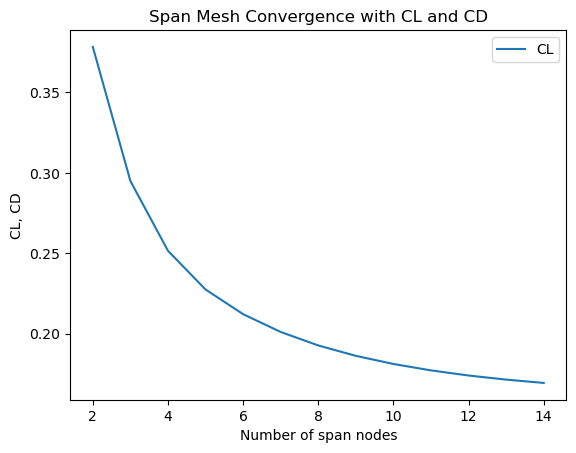

In [ ]:
plt.plot(N_span, CLss, label="CL")
plt.title('Span Mesh Convergence with CL and CD')
plt.xlabel('Number of span nodes')
plt.ylabel('CL, CD')
plt.legend()
plt.show()
